# Titanic Data Science Tutorial from Visual Studio Code Documentation
Tutorial accessed here: [LINK](https://code.visualstudio.com/docs/datascience/data-science-tutorial)

## Setup Cell
- By convention, it's best to setup all Python imports in the first cell of the notebook

## Notes on Data Set
Data set can be accessed here: [LINK](https://hbiostat.org/data/repo/titanic.html)

Data provided by OpenML.org

* sibsp = siblings or spouse
* parch = parents or children

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

data = pd.read_csv('data.csv')

## Cleaning Data
- When scanning data, we find that many values in the *'age'* and *'fare'* columns have a *'?'* character instead of a number
- This makes plotting data troublesome
- Using the `.replace` method off of the `data` variable created above allows us to replace those *'?'* characters with numpy's `nan` signifier instead

In [19]:
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare": np.float64})

## Plotting Survivablility

*Once the data is in better shape post-cleaning, use `seaborn` and `matplotlib` to view how certain columns relate to survivablility*

> Once a graph is created, hovering over the images and clicking the graph icon on the top right corner of the image will open a 
> larger view in a different tab

<AxesSubplot:xlabel='survived', ylabel='fare'>

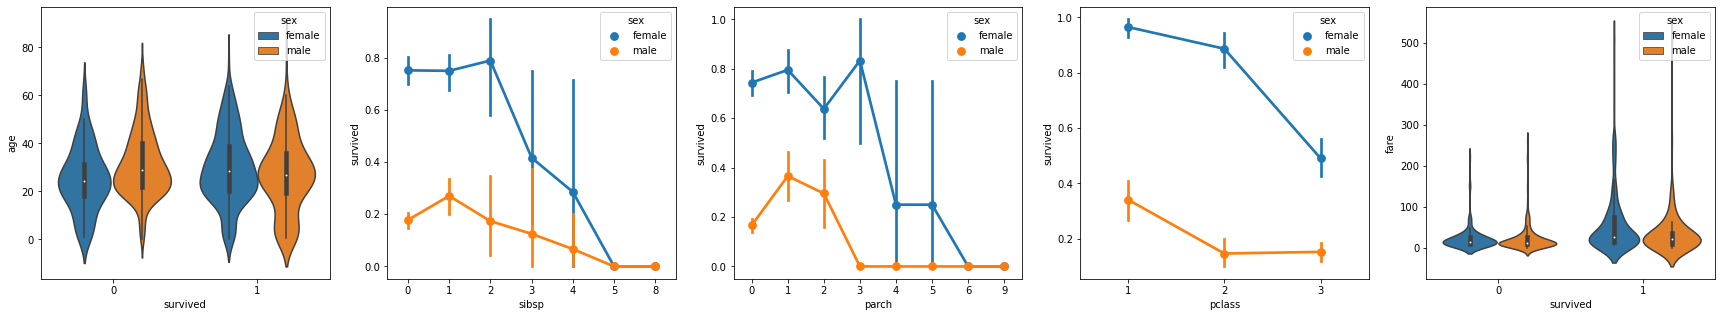

In [20]:
fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

## Modifying Data to Improve Pandas Usability

By replacing all of the gender values that are in **string** format with **number** values, we can use Pandas to calculate correlations between all of the fields of data and the **survived** field

In [21]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [22]:
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


- `.corr()`: Used to find "pairwise correlation" of all columns in a dataframe
- `.abs()`: Used to find absolute values of all numerical values

> The closer a number is to **1**, the more highly correlated it is to the given comparison

*This means that out of all the other columns, gender is the most highly correlated value to survivability*


### Hypothesis: relatives are related in how they affect survivability
***Will group sibsp and parch to see if the combination of the two has a high correlation with survivability***

In [23]:
data['relatives'] = data.apply(lambda row: int(row['sibsp'] + row['parch'] > 0), axis=1)
data.corr().abs()[['survived']]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


> Relatives have a higher correlation when columns are combined
> Therefore, we'll keep that in the dataset

## Readying Dataset to train a model
- Dropping the low value **sibsp** and **parch** columns
- Removing any rows with `NaN` values

In [24]:
data = data[['sex', 'pclass', 'age', 'relatives', 'fare', 'survived']].dropna()

## Train and evaluate a model

Will use the **scikit-learn** library to do pre-processing of the dataset, train a classification model to determine survivability on the Titanic, and then use that model with test data to determine its accuracy

> NOTE: Following code relates to machine learning, WAY outside of my wheelhouse

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data[['sex', 'pclass', 'age', 'relatives', 'fare']], data.survived, test_size=0.2, random_state=0)

In [26]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [27]:
model = GaussianNB()
model.fit(X_train, y_train)

predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885
